Betting with Kelly Criterion - Single Coin Example
==================================================

In the first example, we demonstrate the increase in log wealth during a betting run. Let's consider, we have a coin whose head turns up with probability 0.55. We gamble $m$ times and in each time we make $n$ bets.

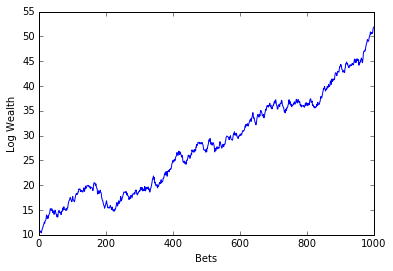

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pylab
from SingleCoin import SingleCoinBetting


capital = 10
coin = SingleCoinBetting(p=0.55, initial_logwealth=capital)

m = 1000
n = 10
growth = []
#expected_growth = []
for i in xrange(m):
#    expected_growth.append(coin.predict_gamble(n, coin.f_kelly))
    growth.append(coin.gamble(n))

pylab.xlabel(r'Bets')
pylab.ylabel(r'Log Wealth')
plt.plot(range(m), growth)
#plt.plot(range(m), expected_growth)
#TODO: plot expected growth along side this to show the difference. 

We can imagine that the growth in log wealth is expected to change if we bet small or large number of times. So we can check growth as a function of $n$.

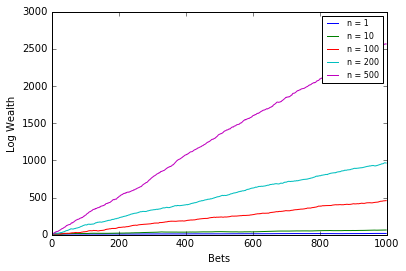

In [17]:
n_range = [1, 10, 100, 200, 500]
for n in n_range:
    coin = SingleCoinBetting(p=0.55, initial_logwealth=capital)
    growth = []
    for i in xrange(m):
        growth.append(coin.gamble(n, None))
    pylab.xlabel(r'Bets')
    pylab.ylabel(r'Log Wealth')
    plt.plot(range(m), growth, label="n = "+str(n))
plt.legend(fontsize=8)

Based on the above plot, it is clear that in each gambling run, betting larger number of times leads to higher wealth (thereby explaining gambling addiction :P).

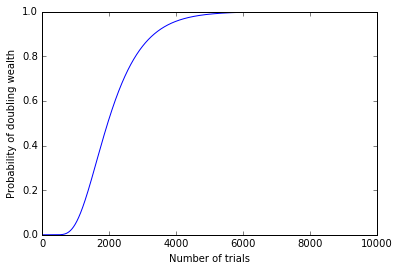

In [29]:
current_wealth = np.exp(capital)
target_wealth = 2*current_wealth
log_target_wealth = np.log(target_wealth)
coin = SingleCoinBetting(p=0.55, initial_logwealth=capital)

n_range = range(1, 10001)
probs = []
for n in n_range:
    probs.append(coin.prob_reaching_target(target_wealth, n))
pylab.xlabel(r'Number of trials')
pylab.ylabel(r'Probability of doubling wealth')
plt.plot(n_range, probs)


Now we test how analytically calculated probability compares against the frequency of doubling wealth in m bets

In [24]:
analytical_prob = coin.prob_reaching_target(target_wealth, 5000)
print analytical_prob

0.0511530532478


In [27]:
# The code for testing probab function goes here
